In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import math
import copy
import imageio
import seaborn as sns
from glob import glob
from pathlib import Path
from collections import deque
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from IPython.display import Image
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
import seaborn as sns
import plotly.express as px
from IPython.display import SVG
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16, inception_v3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.layers import Input, Lambda, Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, MaxPooling2D, \
    Permute, TimeDistributed, Bidirectional, GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D, \
    Reshape, Conv2DTranspose, LeakyReLU, Conv1D, AveragePooling1D, MaxPooling1D, Activation, Conv3D, MaxPooling3D

In [4]:
Main_Video_Path = Path("./dataset/anomaly1")
Video_Path = list(Main_Video_Path.glob(r"*/*.mp4"))
Video_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Video_Path))
Video_Path_Series = pd.Series(Video_Path,name="MP4").astype(str)
Video_Labels_Series = pd.Series(Video_Labels,name="CATEGORY")
Main_MP4_Data = pd.concat([Video_Path_Series,Video_Labels_Series],axis=1)

In [5]:
Anomaly_Data = Main_MP4_Data[Main_MP4_Data["CATEGORY"] == "fight"]
NonAnomaly_Data = Main_MP4_Data[Main_MP4_Data["CATEGORY"] == "noFight"]

Anomaly_Data = Anomaly_Data.reset_index()
NonAnomaly_Data = NonAnomaly_Data.reset_index()

In [6]:
Anomaly_Data

,index,MP4,CATEGORY
0,0,dataset\anomaly1\fight\fi001.mp4,fight
1,1,dataset\anomaly1\fight\fi002.mp4,fight
2,2,dataset\anomaly1\fight\fi003.mp4,fight
3,3,dataset\anomaly1\fight\fi004.mp4,fight
4,4,dataset\anomaly1\fight\fi005.mp4,fight
...,...,...,...
145,145,dataset\anomaly1\fight\fi146.mp4,fight
146,146,dataset\anomaly1\fight\fi147.mp4,fight
147,147,dataset\anomaly1\fight\fi148.mp4,fight
148,148,dataset\anomaly1\fight\fi149.mp4,fight


In [7]:
NonAnomaly_Data

,index,MP4,CATEGORY
0,150,dataset\anomaly1\noFight\nofi001.mp4,noFight
1,151,dataset\anomaly1\noFight\nofi002.mp4,noFight
2,152,dataset\anomaly1\noFight\nofi003.mp4,noFight
3,153,dataset\anomaly1\noFight\nofi004.mp4,noFight
4,154,dataset\anomaly1\noFight\nofi005.mp4,noFight
...,...,...,...
145,295,dataset\anomaly1\noFight\nofi146.mp4,noFight
146,296,dataset\anomaly1\noFight\nofi147.mp4,noFight
147,297,dataset\anomaly1\noFight\nofi148.mp4,noFight
148,298,dataset\anomaly1\noFight\nofi149.mp4,noFight


In [8]:
Main_Video_Path = Path("./dataset/anomaly2/Real Life Violence Dataset")
Video_Path = list(Main_Video_Path.glob(r"*/*.mp4"))
Video_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Video_Path))
Video_Path_Series = pd.Series(Video_Path,name="MP4").astype(str)
Video_Labels_Series = pd.Series(Video_Labels,name="CATEGORY")
Main_MP4_Data = pd.concat([Video_Path_Series,Video_Labels_Series],axis=1)

In [9]:
Main_MP4_Data["CATEGORY"].replace({'Violence':'fight','NonViolence':'noFight'}, inplace=True)
AD = Main_MP4_Data[Main_MP4_Data["CATEGORY"] == "fight"]
NAD = Main_MP4_Data[Main_MP4_Data["CATEGORY"] == "noFight"]



C:\Users\srhan\AppData\Local\Temp\ipykernel_13624\50674731.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Main_MP4_Data["CATEGORY"].replace({'Violence':'fight','NonViolence':'noFight'}, inplace=True)


In [10]:
AD

,MP4,CATEGORY
951,dataset\anomaly2\Real Life Violence Dataset\Vi...,fight
952,dataset\anomaly2\Real Life Violence Dataset\Vi...,fight
953,dataset\anomaly2\Real Life Violence Dataset\Vi...,fight
954,dataset\anomaly2\Real Life Violence Dataset\Vi...,fight
955,dataset\anomaly2\Real Life Violence Dataset\Vi...,fight
...,...,...
1946,dataset\anomaly2\Real Life Violence Dataset\Vi...,fight
1947,dataset\anomaly2\Real Life Violence Dataset\Vi...,fight
1948,dataset\anomaly2\Real Life Violence Dataset\Vi...,fight
1949,dataset\anomaly2\Real Life Violence Dataset\Vi...,fight


In [11]:
NAD

,MP4,CATEGORY
0,dataset\anomaly2\Real Life Violence Dataset\No...,noFight
1,dataset\anomaly2\Real Life Violence Dataset\No...,noFight
2,dataset\anomaly2\Real Life Violence Dataset\No...,noFight
3,dataset\anomaly2\Real Life Violence Dataset\No...,noFight
4,dataset\anomaly2\Real Life Violence Dataset\No...,noFight
...,...,...
946,dataset\anomaly2\Real Life Violence Dataset\No...,noFight
947,dataset\anomaly2\Real Life Violence Dataset\No...,noFight
948,dataset\anomaly2\Real Life Violence Dataset\No...,noFight
949,dataset\anomaly2\Real Life Violence Dataset\No...,noFight


In [12]:
Anomaly_Data = pd.concat([Anomaly_Data, AD], ignore_index=True, sort=False)
NonAnomaly_Data = pd.concat([NonAnomaly_Data, NAD], ignore_index=True, sort=False)

In [13]:
Anomaly_Data

,index,MP4,CATEGORY
0,0.0,dataset\anomaly1\fight\fi001.mp4,fight
1,1.0,dataset\anomaly1\fight\fi002.mp4,fight
2,2.0,dataset\anomaly1\fight\fi003.mp4,fight
3,3.0,dataset\anomaly1\fight\fi004.mp4,fight
4,4.0,dataset\anomaly1\fight\fi005.mp4,fight
...,...,...,...
1145,NaN,dataset\anomaly2\Real Life Violence Dataset\Vi...,fight
1146,NaN,dataset\anomaly2\Real Life Violence Dataset\Vi...,fight
1147,NaN,dataset\anomaly2\Real Life Violence Dataset\Vi...,fight
1148,NaN,dataset\anomaly2\Real Life Violence Dataset\Vi...,fight


In [14]:
NonAnomaly_Data

,index,MP4,CATEGORY
0,150.0,dataset\anomaly1\noFight\nofi001.mp4,noFight
1,151.0,dataset\anomaly1\noFight\nofi002.mp4,noFight
2,152.0,dataset\anomaly1\noFight\nofi003.mp4,noFight
3,153.0,dataset\anomaly1\noFight\nofi004.mp4,noFight
4,154.0,dataset\anomaly1\noFight\nofi005.mp4,noFight
...,...,...,...
1096,NaN,dataset\anomaly2\Real Life Violence Dataset\No...,noFight
1097,NaN,dataset\anomaly2\Real Life Violence Dataset\No...,noFight
1098,NaN,dataset\anomaly2\Real Life Violence Dataset\No...,noFight
1099,NaN,dataset\anomaly2\Real Life Violence Dataset\No...,noFight


**Merging all different Data**

In [15]:
Cdata = NonAnomaly_Data

In [16]:
Cdata = pd.concat([NonAnomaly_Data, Anomaly_Data], ignore_index=True, sort=False)

In [17]:
Cdata

,index,MP4,CATEGORY
0,150.0,dataset\anomaly1\noFight\nofi001.mp4,noFight
1,151.0,dataset\anomaly1\noFight\nofi002.mp4,noFight
2,152.0,dataset\anomaly1\noFight\nofi003.mp4,noFight
3,153.0,dataset\anomaly1\noFight\nofi004.mp4,noFight
4,154.0,dataset\anomaly1\noFight\nofi005.mp4,noFight
...,...,...,...
2246,NaN,dataset\anomaly2\Real Life Violence Dataset\Vi...,fight
2247,NaN,dataset\anomaly2\Real Life Violence Dataset\Vi...,fight
2248,NaN,dataset\anomaly2\Real Life Violence Dataset\Vi...,fight
2249,NaN,dataset\anomaly2\Real Life Violence Dataset\Vi...,fight


In [18]:
Cdata["CATEGORY"].replace({'fight':1,'noFight':0}, inplace=True)

C:\Users\srhan\AppData\Local\Temp\ipykernel_13624\1989987325.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Cdata["CATEGORY"].replace({'fight':1,'noFight':0}, inplace=True)
C:\Users\srhan\AppData\Local\Temp\ipykernel_13624\1989987325.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Cdata["CA

In [19]:
Cdata

,index,MP4,CATEGORY
0,150.0,dataset\anomaly1\noFight\nofi001.mp4,0
1,151.0,dataset\anomaly1\noFight\nofi002.mp4,0
2,152.0,dataset\anomaly1\noFight\nofi003.mp4,0
3,153.0,dataset\anomaly1\noFight\nofi004.mp4,0
4,154.0,dataset\anomaly1\noFight\nofi005.mp4,0
...,...,...,...
2246,NaN,dataset\anomaly2\Real Life Violence Dataset\Vi...,1
2247,NaN,dataset\anomaly2\Real Life Violence Dataset\Vi...,1
2248,NaN,dataset\anomaly2\Real Life Violence Dataset\Vi...,1
2249,NaN,dataset\anomaly2\Real Life Violence Dataset\Vi...,1


## **Video Preprocessing**

In [20]:
Anomaly_Data.MP4[1]

'dataset\\anomaly1\\fight\\fi002.mp4'

In [21]:
import os

os.makedirs('./dataset/Frames', exist_ok=True)


In [22]:
a_train,a_valid = train_test_split(Anomaly_Data.MP4, test_size=0.1,random_state=17)
print("a_train {} samples , a_valid {} samples".format(len(a_train),len(a_valid)))

a_train 1035 samples , a_valid 115 samples


In [23]:
na_train,na_valid = train_test_split(NonAnomaly_Data.MP4, test_size=0.1,random_state=17)
print("na_train {} samples , na_valid {} samples".format(len(na_train),len(na_valid)))

na_train 990 samples , na_valid 111 samples


In [24]:
os.makedirs('./dataset/Frames/train', exist_ok=True)
os.makedirs('./dataset/Frames/test', exist_ok=True)
os.makedirs('./dataset/Frames/train/nonanomaly', exist_ok=True)
os.makedirs('./dataset/Frames/test/nonanomaly', exist_ok=True)
os.makedirs('./dataset/Frames/train/anomaly', exist_ok=True)
os.makedirs('./dataset/Frames/test/anomaly', exist_ok=True)

In [31]:
def make_frames(df,tag,sset):
    a = 0
    for file_video in df:
        Video_File_Path = file_video

        Video_Caption = cv2.VideoCapture(Video_File_Path)
        Frame_Rate = 15
        count = 0
        temp = []
        if Video_Caption.isOpened():
            os.mkdir('./dataset/Frames/{}/{}/a{}'.format(sset,tag,a))
        while Video_Caption.isOpened():

            Current_Frame_ID = Video_Caption.get(1)

            ret,frame = Video_Caption.read()

            if ret != True:
                break

            if Current_Frame_ID % math.floor(Frame_Rate) == 0:
                image = cv2.resize(frame,(256,256))
                cv2.imwrite("./dataset/Frames/{}/{}/a{}/frame{}.jpg".format(sset,tag,a,count), image)
                count += 1
        a += 1

        Video_Caption.release()







In [32]:
make_frames(a_train,tag='anomaly',sset='train')

In [33]:
make_frames(a_valid,tag='anomaly',sset='test')

In [34]:
make_frames(na_train,tag='nonanomaly',sset='train')

In [35]:
make_frames(na_valid,tag='nonanomaly',sset='test')

In [25]:
sorted(os.listdir("./dataset/Frames/test"))

['anomaly', 'nonanomaly']

In [26]:
class Config():
    def __init__(self):
        pass

    num_classes=2
    labels_to_class = {0:'nonanomaly',1:'anomaly'}
    class_to_labels = {'nonanomaly':0,'anomaly':1}
    resize = 224
    num_epochs =10
    batch_size =10

In [27]:
train_data_path = './dataset/Frames/train'
test_data_path = "./dataset/Frames/test"

In [28]:
if not os.path.exists('data_files'):
    os.mkdir('data_files')
if not os.path.exists('data_files/train'):
    os.mkdir('data_files/train')
if not os.path.exists('data_files/test'):
    os.mkdir('data_files/test')

In [29]:
num_classes = 2
labels_name={'nonanomaly':0,'anomaly':1}

In [30]:
data_dir_list = os.listdir(train_data_path)
data_dir_list

['anomaly', 'nonanomaly']

In [31]:
import os
import pandas as pd

def make_train(train_data_path):
    data_dir_list = os.listdir(train_data_path)
    for data_dir in data_dir_list:  # looping over every activity
        label = labels_name[str(data_dir)]
        video_list = os.listdir(os.path.join(train_data_path, data_dir))
        for vid in video_list:  # looping over every video within an activity
            train_df = pd.DataFrame(columns=['FileName', 'Label', 'ClassName'])
            img_list = os.listdir(os.path.join(train_data_path, data_dir, vid))
            for img in img_list:  # looping over every frame within the video
                img_path = os.path.join(train_data_path, data_dir, vid, img)
                # Create a temporary DataFrame for the new row
                new_row = pd.DataFrame({'FileName': [img_path], 'Label': [label], 'ClassName': [data_dir]})
                # Concatenate with the existing DataFrame
                train_df = pd.concat([train_df, new_row], ignore_index=True)
            file_name = '{}_{}.csv'.format(data_dir, vid)
            train_df.to_csv('data_files/train/{}'.format(file_name), index=False)

make_train(train_data_path)


In [32]:


def make_test(test_data_path):
    data_dir_list = os.listdir(test_data_path)
    for data_dir in data_dir_list:  # looping over every activity
        label = labels_name[str(data_dir)]
        video_list = os.listdir(os.path.join(test_data_path, data_dir))
        for vid in video_list:  # looping over every video within an activity
            test_df = pd.DataFrame(columns=['FileName', 'Label', 'ClassName'])
            img_list = os.listdir(os.path.join(test_data_path, data_dir, vid))
            for img in img_list:  # looping over every frame within the video
                img_path = os.path.join(test_data_path, data_dir, vid, img)
                # Create a temporary DataFrame for the new row
                new_row = pd.DataFrame({'FileName': [img_path], 'Label': [label], 'ClassName': [data_dir]})
                # Concatenate with the existing DataFrame
                test_df = pd.concat([test_df, new_row], ignore_index=True)
            file_name = '{}_{}.csv'.format(data_dir, vid)
            test_df.to_csv('data_files/test/{}'.format(file_name), index=False)

make_test(test_data_path)


In [33]:
class ActionDataGenerator(object):
    def __init__(self, root_data_path, temporal_stride=1, temporal_length=16, resize=224):
        self.root_data_path = root_data_path
        self.temporal_length = temporal_length
        self.temporal_stride = temporal_stride
        self.resize = resize

    def file_generator(self, data_path, data_files):
        '''
        data_files - list of csv files to be read.
        '''
        if not data_files:
            print("Warning: No data files found in", data_path)
            return

        for f in data_files:
            try:
                file_path = os.path.join(data_path, f)
                if not os.path.exists(file_path):
                    print(f"Warning: File {file_path} does not exist")
                    continue

                tmp_df = pd.read_csv(file_path)
                if tmp_df.empty:
                    print(f"Warning: Empty CSV file - {f}")
                    continue

                label_list = list(tmp_df['Label'])
                total_images = len(label_list)

                if total_images >= self.temporal_length:
                    num_samples = int((total_images-self.temporal_length)/self.temporal_stride)+1
                    print(f'Processing file {f} with {num_samples} samples')
                    img_list = list(tmp_df['FileName'])
                else:
                    print(f'Skipping file {f} - too few frames ({total_images} < {self.temporal_length})')
                    continue

                samples = deque(maxlen=self.temporal_length)
                for img in img_list:
                    if not os.path.exists(img):
                        print(f"Warning: Image file does not exist - {img}")
                        continue
                    samples.append(img)
                    if len(samples) == self.temporal_length:
                        samples_c = copy.deepcopy(samples)
                        yield list(samples_c), label_list[0]
                        for _ in range(self.temporal_stride):
                            if samples:
                                samples.popleft()

            except Exception as e:
                print(f"Error processing file {f}: {str(e)}")
                continue

    def load_samples(self, data_cat='train'):
        data_path = os.path.join(self.root_data_path, data_cat)
        if not os.path.exists(data_path):
            raise ValueError(f"Data path does not exist: {data_path}")

        csv_data_files = os.listdir(data_path)
        if not csv_data_files:
            raise ValueError(f"No files found in {data_path}")

        print(f"Found {len(csv_data_files)} files in {data_path}")

        file_gen = self.file_generator(data_path, csv_data_files)
        data_list = []

        for x, y in file_gen:
            data_list.append([x, y])

        if not data_list:
            raise ValueError("No valid samples were generated")

        print(f"Generated {len(data_list)} samples from {data_path}")
        return data_list

    def data_generator(self, data, batch_size=10, shuffle=True):
        """
        Yields the next training batch.
        """
        if not data:
            raise ValueError("Empty data provided to generator")

        num_samples = len(data)
        if shuffle:
            data = self.shuffle_data(data)

        while True:
            for offset in range(0, num_samples, batch_size):
                batch_samples = data[offset:offset+batch_size]
                X_train = []
                y_train = []

                for batch_sample in batch_samples:
                    try:
                        x = batch_sample[0]
                        y = batch_sample[1]
                        temp_data_list = []

                        for img_path in x:
                            try:
                                if not os.path.exists(img_path):
                                    raise FileNotFoundError(f"Image not found: {img_path}")

                                img = cv2.imread(img_path)
                                if img is None:
                                    raise ValueError(f"Failed to read image: {img_path}")

                                img = self.preprocess_image(img)
                                temp_data_list.append(img)

                            except Exception as e:
                                print(f"Error processing image {img_path}: {str(e)}")
                                raise

                        if len(temp_data_list) == self.temporal_length:
                            X_train.append(temp_data_list)
                            y_train.append(y)

                    except Exception as e:
                        print(f"Error processing batch sample: {str(e)}")
                        continue

                if not X_train or not y_train:
                    print("Warning: Empty batch generated, skipping...")
                    continue

                X_train = np.array(X_train)
                y_train = np.array(y_train)
                y_train = to_categorical(y_train, 2)

                yield X_train, y_train

    def shuffle_data(self, samples):
        return shuffle(samples, random_state=2)

    def preprocess_image(self, img):
        img = cv2.resize(img, (self.resize, self.resize))
        img = img/255.0
        return img

In [34]:
# Set your paths
root_data_path = 'data_files'
train_data_path = 'path/to/your/train/data'
test_data_path = 'path/to/your/test/data'

# Create directories if they don't exist
os.makedirs('data_files/train', exist_ok=True)
os.makedirs('data_files/test', exist_ok=True)

In [35]:
data_gen_obj = ActionDataGenerator(root_data_path, temporal_stride=2, temporal_length=5)

In [36]:
train_data = data_gen_obj.load_samples(data_cat='train')

test_data = data_gen_obj.load_samples(data_cat='test')

Found 2025 files in data_files\train
Processing file anomaly_a0.csv with 3 samples
Processing file anomaly_a1.csv with 2 samples
Processing file anomaly_a10.csv with 5 samples
Processing file anomaly_a100.csv with 3 samples
Processing file anomaly_a1000.csv with 3 samples
Processing file anomaly_a1001.csv with 2 samples
Processing file anomaly_a1002.csv with 3 samples
Processing file anomaly_a1003.csv with 4 samples
Processing file anomaly_a1004.csv with 4 samples
Processing file anomaly_a1005.csv with 3 samples
Processing file anomaly_a1006.csv with 3 samples
Processing file anomaly_a1007.csv with 4 samples
Processing file anomaly_a1008.csv with 3 samples
Processing file anomaly_a1009.csv with 4 samples
Processing file anomaly_a101.csv with 1 samples
Processing file anomaly_a1010.csv with 4 samples
Processing file anomaly_a1011.csv with 3 samples
Processing file anomaly_a1012.csv with 3 samples
Processing file anomaly_a1013.csv with 4 samples
Processing file anomaly_a1014.csv with 3 s

In [37]:

print('num of train_samples: {}'.format(len(train_data)))

print('num of test_samples: {}'.format(len(test_data)))


num of train_samples: 5846
num of test_samples: 533


In [38]:

train_generator = data_gen_obj.data_generator(train_data,batch_size=10,shuffle=True)

test_generator = data_gen_obj.data_generator(test_data,batch_size=10,shuffle=True)

In [39]:
Callback_Stop_Early = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode='auto')

In [40]:
def get_model():
    # Load VGG16 without top layers and with appropriate input shape
    base_model = VGG16(weights='imagenet', 
                      include_top=False,
                      input_shape=(224, 224, 3))
    
    # Freeze VGG16 layers
    for layer in base_model.layers:
        layer.trainable = False
    
    # Create new model
    model = Sequential()
    
    # TimeDistributed wrapper for VGG16 to process each frame
    model.add(TimeDistributed(base_model, input_shape=(5, 224, 224, 3)))
    
    # Add Global Average Pooling to reduce dimensions
    model.add(TimeDistributed(GlobalAveragePooling2D()))
    
    # Add LSTM layers to process temporal information
    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(0.25))
    model.add(LSTM(128))
    model.add(Dropout(0.25))
    
    # Dense layers for classification
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    
    # Compile model
    model.compile(loss=categorical_crossentropy,
                 optimizer=Adam(learning_rate=0.0001),
                 metrics=['accuracy'])
    
    model.summary()
    return model

In [41]:

model = get_model()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 69s 1us/step


c:\Users\srhan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed                │ (None, 5, 7, 7, 512)   │    14,714,688 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 5, 512)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 5, 256)         │       787,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,766,338 (60.14 MB)

 Trainable params: 1,051,650 (4.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [53]:
from tensorflow.keras.utils import to_categorical


In [42]:

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_data) // 10,
    epochs=10,
    callbacks=[Callback_Stop_Early],
    validation_data=test_generator,
    validation_steps=len(test_data) // 10
)

Epoch 1/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 2108s 4s/step - accuracy: 0.6776 - loss: 0.5791 - val_accuracy: 0.7925 - val_loss: 0.4273
Epoch 2/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 2190s 4s/step - accuracy: 0.8741 - loss: 0.2977 - val_accuracy: 0.7954 - val_loss: 0.4455
Epoch 3/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 2017s 3s/step - accuracy: 0.8945 - loss: 0.2476 - val_accuracy: 0.8222 - val_loss: 0.3869
Epoch 4/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 2066s 4s/step - accuracy: 0.9136 - loss: 0.2141 - val_accuracy: 0.8700 - val_loss: 0.2926
Epoch 5/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 2079s 4s/step - accuracy: 0.9237 - loss: 0.1971 - val_accuracy: 0.8642 - val_loss: 0.3045
Epoch 6/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 2079s 4s/step - accuracy: 0.9373 - loss: 0.1711 - val_accuracy: 0.8834 - val_loss: 0.2652
Epoch 7/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 2077s 4s/step - accuracy: 0.9433 - loss: 0.1541 - val_accuracy: 0.9235 - val_loss: 0.2362
Epoch 8/10
584/584 ━━━━━━━━━━━━━━━━━━━━ 2007s 3s/step - accuracy: 0.9441 - loss: 0.1485 - 

In [43]:
model.save('./VGG16+LSTM.keras')

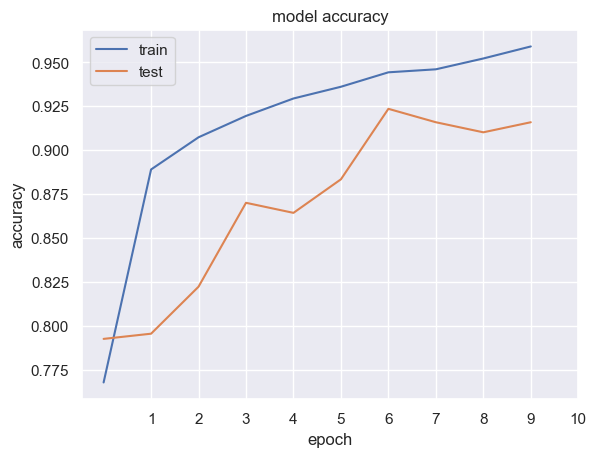

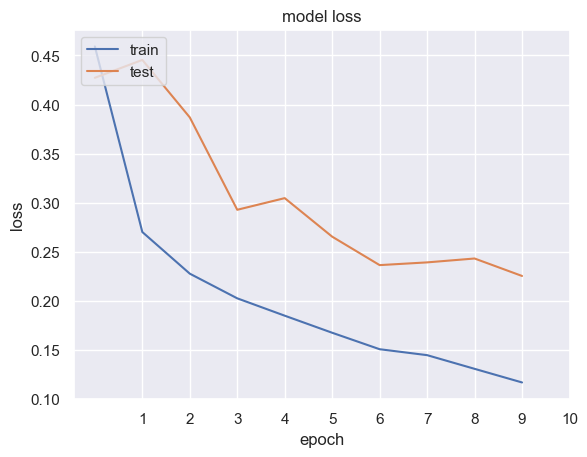

In [46]:
sns.set()
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xticks(range(1, len(history.history['accuracy']) + 1))  # Adjusting to show all epochs
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xticks(range(1, len(history.history['loss']) + 1))  # Adjusting to show all epochs
plt.show()
